In [1]:
using Pkg
Pkg.activate("/media/mat/HDD/AdaptiveTransportMap/")

 Activating environment at `/media/mat/HDD/AdaptiveTransportMap/Project.toml`


In [83]:
using Revise
using AdaptiveTransportMap
using LinearAlgebra
using Test
using ForwardDiff
using NonlinearSolve
using NLsolve
using Distributions
using BenchmarkTools

In [3]:
using Plots
default(tickfont = font("CMU Serif", 9), 
        titlefont = font("CMU Serif", 14), 
        guidefont = font("CMU Serif", 12),
        legendfont = font("CMU Serif", 10),
        grid = false)
# clibrary(:colorbrewer)
pyplot()

using LaTeXStrings
PyPlot.rc("text", usetex = "true")
PyPlot.rc("font", family = "CMU Serif")
# gr()
using ColorSchemes

In [48]:
Nx = 10
Ne = 500

X = randn(Nx,Ne).^2 .* (1.0 .+ randn(Nx, Ne));

In [49]:
m = 20
S = HermiteMap(m, X)

HermiteMap(20, 10, LinearTransform(10, [1.020752028531853, 0.9294484143148835, 0.9329769157807755, 1.1073190630268823, 1.0450380260085588, 0.8979486986761751, 1.2185689238351176, 0.9488534714301613, 0.8918955732858822, 0.8972208535074333], [2.289291788518478 0.0 … 0.0 0.0; 0.0 2.1760157754502947 … 0.0 0.0; … ; 0.0 0.0 … 2.0865314403600452 0.0; 0.0 0.0 … 0.0 1.9311471528958946], true), MapComponent[Map component of dimension 1 with Nψ 1 active features
, Map component of dimension 2 with Nψ 1 active features
, Map component of dimension 3 with Nψ 1 active features
, Map component of dimension 4 with Nψ 1 active features
, Map component of dimension 5 with Nψ 1 active features
, Map component of dimension 6 with Nψ 1 active features
, Map component of dimension 7 with Nψ 1 active features
, Map component of dimension 8 with Nψ 1 active features
, Map component of dimension 9 with Nψ 1 active features
, Map component of dimension 10 with Nψ 1 active features
])

In [50]:
optimize(S, X, "kfolds"; withqr = true)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:28


HermiteMap(20, 10, LinearTransform(10, [1.020752028531853, 0.9294484143148835, 0.9329769157807755, 1.1073190630268823, 1.0450380260085588, 0.8979486986761751, 1.2185689238351176, 0.9488534714301613, 0.8918955732858822, 0.8972208535074333], [2.289291788518478 0.0 … 0.0 0.0; 0.0 2.1760157754502947 … 0.0 0.0; … ; 0.0 0.0 … 2.0865314403600452 0.0; 0.0 0.0 … 0.0 1.9311471528958946], true), MapComponent[Map component of dimension 1 with Nψ 14 active features
, Map component of dimension 2 with Nψ 19 active features
, Map component of dimension 3 with Nψ 17 active features
, Map component of dimension 4 with Nψ 13 active features
, Map component of dimension 5 with Nψ 11 active features
, Map component of dimension 6 with Nψ 18 active features
, Map component of dimension 7 with Nψ 20 active features
, Map component of dimension 8 with Nψ 5 active features
, Map component of dimension 9 with Nψ 12 active features
, Map component of dimension 10 with Nψ 14 active features
])

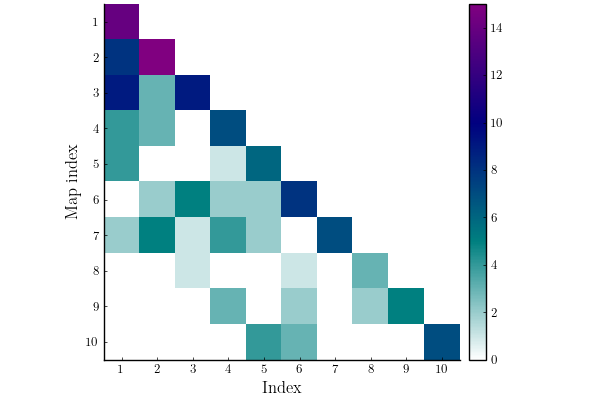

In [51]:
plot(S)

In [52]:
F = rand(Laplace(), (Nx, Ne))
F0 = deepcopy(F);

In [53]:
xrange = -5:0.01:5.0

Xrange = zeros(Nx, length(xrange))
Xrange[end,:] .= collect(xrange)
view(Xrange,1:Nx-1,:) .= repeat(randn(Nx-1), 1, length(xrange));

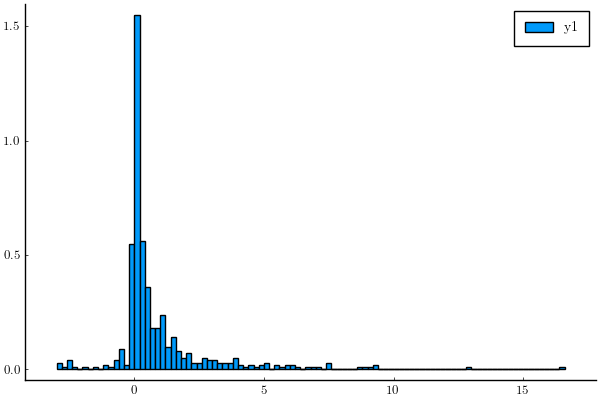

In [62]:
histogram(sort(X[end,:]),  bins = 90, normalize = :pdf)

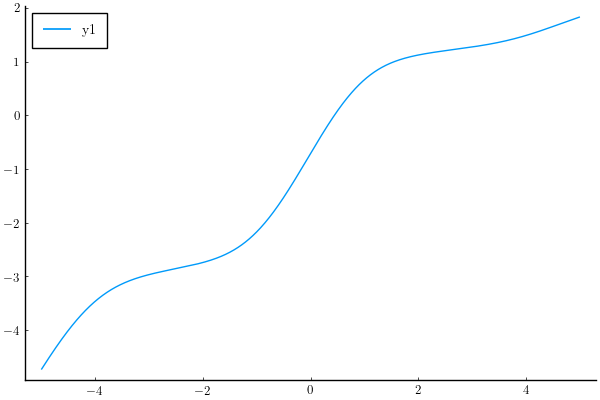

In [55]:
plot(xrange, evaluate(S, Xrange; start = Nx)[end,:])

In [84]:
cachexold = zeros(Ne)
@btime copyto!(cachexold, view(X,Nx,:))

  529.096 ns (2 allocations: 64 bytes)


500-element Array{Float64,1}:
  0.29627123961416735
  4.91172424862894
  0.41083127522620944
  0.06465189650720538
  0.09639967258076099
  2.0077090552674837
  0.40556577057198073
  1.3016588547167571
  0.3182737439387284
  1.4791153753491555
  0.00023159110332693356
  1.1930188623674187
 -0.00020955683935286462
  ⋮
  0.5683335750427138
  1.8630438154815674
  0.028935099174575596
  0.4184186371954588
  1.16289236198097
  0.0019952008753254535
  0.03242090073250459
  0.3666365728963573
  0.24523540285764323
  0.0006496480614387456
  1.3002009209267973
  0.00030735234906675846

In [86]:
@btime copyto!(cachexold, X[end,:])

  912.565 ns (2 allocations: 4.08 KiB)


500-element Array{Float64,1}:
  0.29627123961416735
  4.91172424862894
  0.41083127522620944
  0.06465189650720538
  0.09639967258076099
  2.0077090552674837
  0.40556577057198073
  1.3016588547167571
  0.3182737439387284
  1.4791153753491555
  0.00023159110332693356
  1.1930188623674187
 -0.00020955683935286462
  ⋮
  0.5683335750427138
  1.8630438154815674
  0.028935099174575596
  0.4184186371954588
  1.16289236198097
  0.0019952008753254535
  0.03242090073250459
  0.3666365728963573
  0.24523540285764323
  0.0006496480614387456
  1.3002009209267973
  0.00030735234906675846

In [118]:
@btime std(cachexold)

  101.260 ns (1 allocation: 16 bytes)


1.931147152895895

In [123]:
Xpost = deepcopy(X)[:,1:1]
@btime inverse!(Xpost, copy(F[:,1:1]), S)

  233.605 μs (4289 allocations: 267.03 KiB)


10×1 Array{Float64,2}:
 -6.6940053024980894
  0.7813151227451507
 -0.1545225018963985
  1.5829584025685157
 -0.2182828264926049
  1.6811151650045222
  0.36005280775071213
  0.6414972076521022
  0.9728650754039316
 -0.5096409881052824

In [125]:
Xpost = deepcopy(X)
@btime inverse!(Xpost, copy(F), S)

  10.562 ms (12123 allocations: 20.68 MiB)


10×500 Array{Float64,2}:
 -6.69432    -0.325811  0.866688   …   3.99049    0.800305   -5.34821
  0.652841    1.00699   0.0709028      0.119864   0.782312    0.332934
 -0.147232    1.01834   0.130148       0.203138  -0.409091    0.863126
  1.56178     0.235563  1.70613        1.21226    0.264081    1.91235
 -0.217985    5.13841   0.250809       0.572872   0.837754   -0.478516
  1.65968    -0.510001  0.795841   …   2.53737    0.0704323   8.82153
  0.0676075  -0.318584  0.725396       1.13007   -0.111888    0.171928
  0.643154    0.987011  1.4607        -0.231542   1.15277     0.125883
  0.971018   -0.361035  1.51833        0.520839   2.40892    -5.70749
 -0.510841    0.269097  0.435094       0.625539   8.08316     0.330348

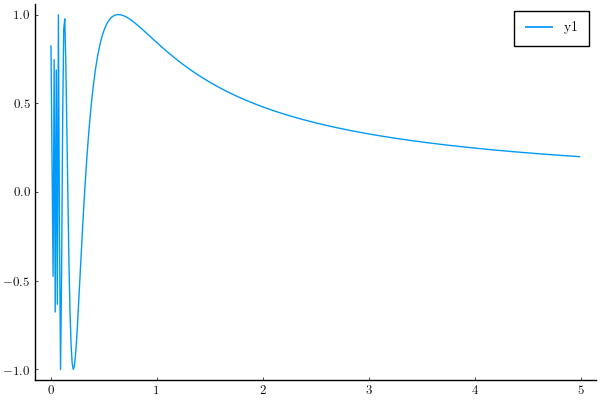

In [99]:
plot(collect(0.001:0.01:5.0), sin.(1 ./ collect(0.001:0.01:5.0)))

In [63]:
maximum(evaluate(S, Xpost)-F)

0.007631680483031644

In [108]:
@btime ψoff = evaluate_diagbasis(S[10].I.f, X)

  18.940 μs (40 allocations: 142.86 KiB)


500×14 Array{Float64,2}:
 0.617909     0.183069     -0.398576  1.0  …   0.236137     1.0  -0.257108
 0.00151744   0.00745327    0.024813  1.0      0.242059     1.0   0.360888
 0.605522     0.248767     -0.355901  1.0      0.302956     1.0  -0.176634
 0.630959     0.0407927    -0.444291  1.0      0.0557021    1.0  -0.3483
 0.630153     0.0607466    -0.441445  1.0      0.0826658    1.0  -0.342476
 0.230572     0.462921      0.494154  1.0  …  -0.382899     1.0  -0.101714
 0.606173     0.245843     -0.358126  1.0      0.300328     1.0  -0.180717
 0.41352      0.538263      0.20302   1.0      0.0455764    1.0   0.355185
 0.615824     0.196001     -0.391343  1.0      0.250444     1.0  -0.243147
 0.365527     0.540657      0.307002  1.0     -0.103223     1.0   0.301408
 0.631619     0.000146277  -0.446622  1.0  …   0.000200298  1.0  -0.353086
 0.44251      0.527922      0.132449  1.0      0.134593     1.0   0.355307
 0.631619    -0.00013236   -0.446622  1.0     -0.000181241  1.0  -0.353086
 ⋮

In [68]:
?nlsolve

search: nlsolve NLsolve NonlinearSolve EnsembleSolution EnsembleTestSolution



No documentation found.

`NLsolve.nlsolve` is a `Function`.

```
# 4 methods for generic function "nlsolve":
[1] nlsolve(df::Union{NLSolversBase.NonDifferentiable, OnceDifferentiable}, initial_x::AbstractArray; method, xtol, ftol, iterations, store_trace, show_trace, extended_trace, linesearch, linsolve, factor, autoscale, m, beta, aa_start, droptol) in NLsolve at /home/mat/.julia/packages/NLsolve/gJL1I/src/nlsolve/nlsolve.jl:1
[2] nlsolve(f, initial_x::AbstractArray; method, autodiff, inplace, kwargs...) in NLsolve at /home/mat/.julia/packages/NLsolve/gJL1I/src/nlsolve/nlsolve.jl:40
[3] nlsolve(f, j, initial_x::AbstractArray; inplace, kwargs...) in NLsolve at /home/mat/.julia/packages/NLsolve/gJL1I/src/nlsolve/nlsolve.jl:56
[4] nlsolve(f, j, fj, initial_x::AbstractArray; inplace, kwargs...) in NLsolve at /home/mat/.julia/packages/NLsolve/gJL1I/src/nlsolve/nlsolve.jl:70
```
